# 1. Importing modules and functions

In [31]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
import seaborn as sns

# 2.Data entry and curation work set

In [32]:
tr = pd.read_csv('HDAC6_alvaDesc_ws.csv', sep=";")

In [33]:
y_tr=tr.HDAC6_measured

In [34]:
x_tr=tr.drop(['HDAC6_measured'], axis=1)

In [35]:
x_tr.shape

(25, 942)

# 3.Data entry and curation test set

In [36]:
ts = pd.read_csv('HDAC6_alvaDesc_ts.csv', sep= ';')

In [37]:
y_ts=ts.HDAC6_measured

In [38]:
x_ts=ts.drop(['HDAC6_measured'], axis=1)

In [39]:
x_ts

,MW,AMW,Se,Mv,nAA,nTA,RBN,RBF,nDB,nH,...,WHALES30_IR,WHALES40_IR,WHALES50_IR,WHALES70_IR,WHALES80_IR,WHALES90_IR,WHALES100_IR,MDEC-11,MDEC-22,MDEN-23
0,408.000,7.410,55.300,0.628,16.000,3.000,10.000,0.175,2.000,25.000,...,-0.118,-0.055,-0.030,0.043,0.077,0.180,0.718,0.000,19.100,0.000
1,454.000,7.560,60.900,0.625,16.000,5.000,11.000,0.177,2.000,27.000,...,-0.030,-0.021,-0.011,0.052,0.075,0.107,0.285,0.200,13.000,0.000
2,428.000,8.230,52.800,0.650,16.000,4.000,9.000,0.167,2.000,22.000,...,-0.084,-0.048,-0.028,0.044,0.065,0.160,0.579,0.000,14.800,0.000
3,472.000,9.080,52.700,0.654,16.000,4.000,9.000,0.167,2.000,22.000,...,-0.082,-0.046,-0.027,0.046,0.067,0.173,0.654,0.000,14.800,0.000
4,486.000,8.840,55.600,0.646,16.000,4.000,10.000,0.175,2.000,24.000,...,-0.093,-0.044,-0.029,0.043,0.065,0.169,0.354,0.000,16.700,0.000
5,442.000,8.040,55.700,0.643,16.000,4.000,10.000,0.175,2.000,24.000,...,-0.079,-0.055,-0.029,0.042,0.066,0.151,0.348,0.000,16.700,0.000
6,468.000,7.420,63.700,0.619,16.000,5.000,12.000,0.185,2.000,29.000,...,-0.033,-0.022,-0.011,0.043,0.071,0.098,0.269,0.200,15.000,0.000


# 4. GBM model building   

In [40]:
seed = 42

In [41]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)

In [42]:
param_grid = {"n_estimators": [1024]}
gbm = GridSearchCV(GradientBoostingClassifier(subsample=0.5, max_features=0.2), 
                   param_grid, n_jobs=2, cv=cv, verbose=1)

In [43]:
gbm.fit(x_tr, y_tr)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=GradientBoostingClassifier(max_features=0.2,
                                                  subsample=0.5),
             n_jobs=2, param_grid={'n_estimators': [1024]}, verbose=1)

In [44]:
best_clf_GBM = gbm.best_estimator_

# 5. Feature importance

In [45]:
imp = best_clf_GBM.feature_importances_

In [46]:
perm_df = pd.DataFrame((imp, x_tr.columns.to_list()),
                       index=('Score', 'Descriptors'))

In [47]:
perm_df

,0,1,2,3,4,5,6,7,8,9,...,932,933,934,935,936,937,938,939,940,941
Score,0.010,0.000,0.000,0.000,0.000,0.022,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
Descriptors,MW,AMW,Se,Mv,nAA,nTA,RBN,RBF,nDB,nH,...,WHALES30_IR,WHALES40_IR,WHALES50_IR,WHALES70_IR,WHALES80_IR,WHALES90_IR,WHALES100_IR,MDEC-11,MDEC-22,MDEN-23


In [48]:
perm_df = perm_df.T
perm_df = perm_df.sort_values(ascending=False, by='Score')

In [49]:
perm_df[:5]

,Score,Descriptors
709,0.111,SaaCH
132,0.076,MATS2v
458,0.064,Mor20u
840,0.048,CATS3D_13_DA
369,0.043,TDB01s


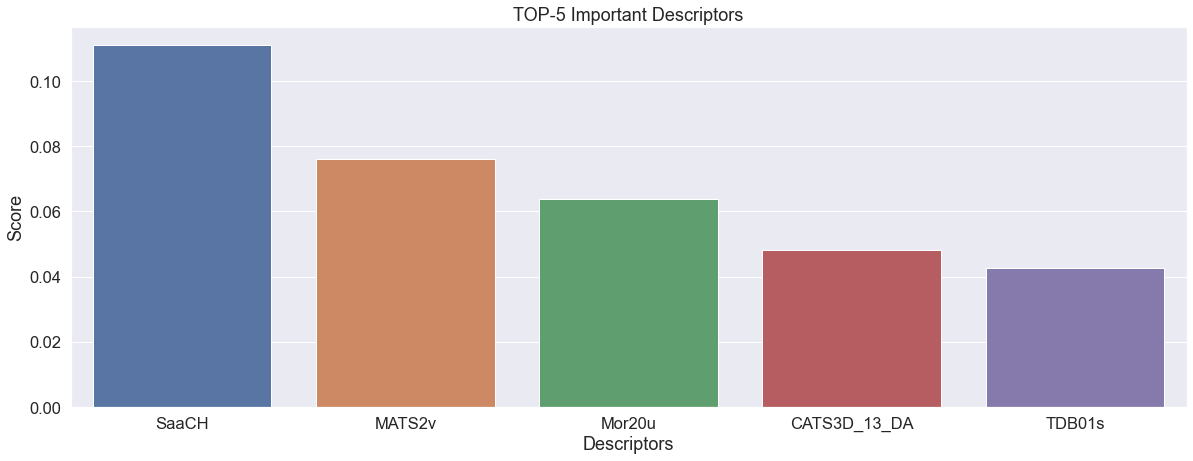

In [50]:
plt.figure(figsize=(20, 7))

sns.set(font_scale=1.5)
sns.barplot(x="Descriptors", y="Score", data=perm_df[:5])
plt.title('TOP-5 Important Descriptors')

plt.show()